In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

<h1>Insert Dataset

In [18]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<h1>Remove unnecessary columns

In [20]:
df = df[['v1', 'v2']]

<h1> Data Preprocessing

In [21]:

df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
if df['v1'].isna().sum() > 0:
    df.dropna(subset=['v1'], inplace=True)
    
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

<h1> Features Before SMOTE and after SMOTE

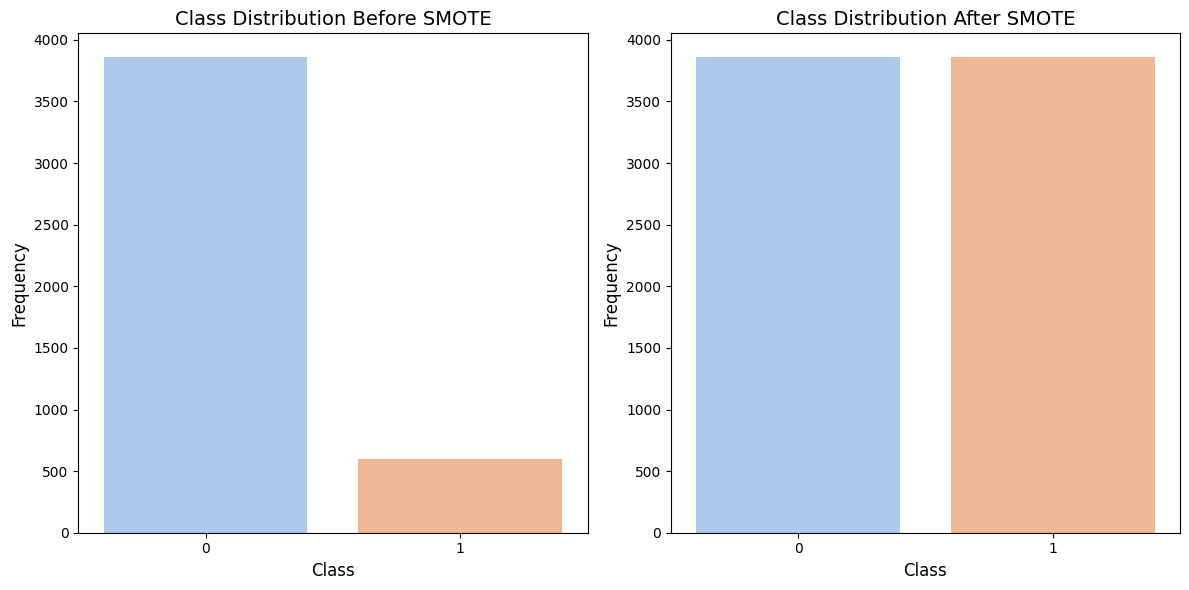

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for enhanced visualization
from imblearn.over_sampling import SMOTE


df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')


df = df[['v1', 'v2']]
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})


if df['v1'].isna().sum() > 0:
    df.dropna(subset=['v1'], inplace=True)
X_train, _, y_train, _ = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


class_counts_before = y_train.value_counts()
class_counts_after = pd.Series(y_train_resampled).value_counts()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette="pastel")
plt.title("Class Distribution Before SMOTE", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette="pastel")
plt.title("Class Distribution After SMOTE", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

<h1> Apply Model

In [27]:
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels ('linear', 'rbf', etc.)
svm_classifier.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

<h1> Output


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



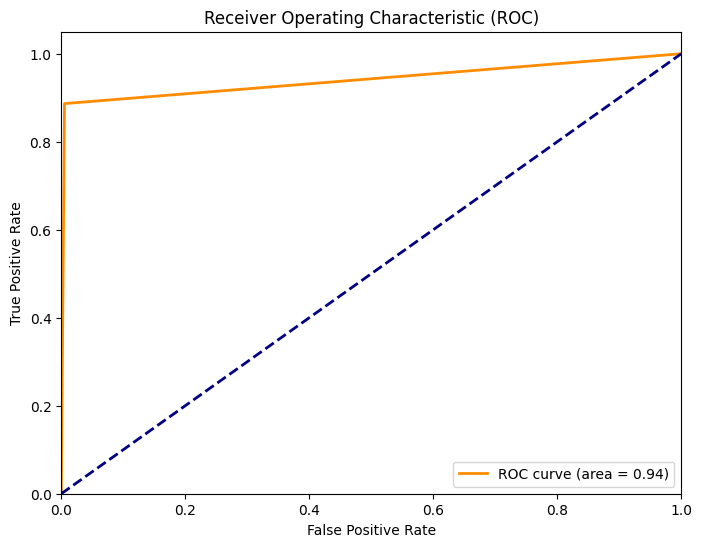

AUC-ROC: 0.9407426597582038


In [28]:
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


print("AUC-ROC:", roc_auc)


<